In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [94]:
data=pd.read_csv('KSEA.csv')

In [95]:
data.head()

,date,actual_mean_temp,actual_min_temp,actual_max_temp,average_min_temp,average_max_temp,record_min_temp,record_max_temp,record_min_temp_year,record_max_temp_year,actual_precipitation,average_precipitation,record_precipitation
0,2014-7-1,77,60,94,54,73,45,94,1948,2014,0.0,0.03,0.75
1,2014-7-2,70,58,81,54,73,43,93,1954,2015,0.0,0.03,0.50
2,2014-7-3,64,57,71,54,74,44,92,1954,2015,0.0,0.03,0.47
3,2014-7-4,66,57,75,54,74,43,92,1949,2015,0.0,0.03,0.57
4,2014-7-5,66,56,76,55,74,47,91,1951,1958,0.0,0.03,0.64


In [96]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
actual_mean_temp,365.0,56.542466,10.437226,30.00,49.00,56.00,65.00,80.00
actual_min_temp,365.0,48.369863,8.707561,23.00,43.00,49.00,55.00,65.00
actual_max_temp,365.0,64.189041,12.867879,37.00,54.00,62.00,75.00,96.00
average_min_temp,365.0,45.046575,7.313657,35.00,37.00,44.00,52.00,57.00
average_max_temp,365.0,60.317808,10.737519,45.00,50.00,59.00,70.00,77.00
record_min_temp,365.0,31.293151,12.273400,0.00,22.00,33.00,42.00,50.00
record_max_temp,365.0,76.131507,13.671950,54.00,63.00,76.00,89.00,103.00
record_min_temp_year,365.0,1962.709589,16.624424,1948.00,1951.00,1955.00,1970.00,2011.00
record_max_temp_year,365.0,1983.230137,18.870777,1945.00,1967.00,1985.00,1999.00,2015.00
actual_precipitation,365.0,0.102548,0.241871,0.00,0.00,0.00,0.06,2.20


In [97]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 13 columns):
date                     365 non-null object
actual_mean_temp         365 non-null int64
actual_min_temp          365 non-null int64
actual_max_temp          365 non-null int64
average_min_temp         365 non-null int64
average_max_temp         365 non-null int64
record_min_temp          365 non-null int64
record_max_temp          365 non-null int64
record_min_temp_year     365 non-null int64
record_max_temp_year     365 non-null int64
actual_precipitation     365 non-null float64
average_precipitation    365 non-null float64
record_precipitation     365 non-null float64
dtypes: float64(3), int64(9), object(1)
memory usage: 37.1+ KB


In [98]:
data.isnull().sum()

date                     0
actual_mean_temp         0
actual_min_temp          0
actual_max_temp          0
average_min_temp         0
average_max_temp         0
record_min_temp          0
record_max_temp          0
record_min_temp_year     0
record_max_temp_year     0
actual_precipitation     0
average_precipitation    0
record_precipitation     0
dtype: int64

#### Missing Values

In [99]:
cols = ["record_min_temp","actual_precipitation"]
data[cols] = data[cols].replace(0,np.nan)
                              

In [100]:
data.isnull().sum()

date                       0
actual_mean_temp           0
actual_min_temp            0
actual_max_temp            0
average_min_temp           0
average_max_temp           0
record_min_temp            1
record_max_temp            0
record_min_temp_year       0
record_max_temp_year       0
actual_precipitation     229
average_precipitation      0
record_precipitation       0
dtype: int64

#### Percentage of Missing Values

In [101]:
def perc_missing(x):
    return(x.isnull().sum()/len(x)*100)

In [102]:
perc_missing(data)

date                      0.000000
actual_mean_temp          0.000000
actual_min_temp           0.000000
actual_max_temp           0.000000
average_min_temp          0.000000
average_max_temp          0.000000
record_min_temp           0.273973
record_max_temp           0.000000
record_min_temp_year      0.000000
record_max_temp_year      0.000000
actual_precipitation     62.739726
average_precipitation     0.000000
record_precipitation      0.000000
dtype: float64

Graphically Visualization of missing column

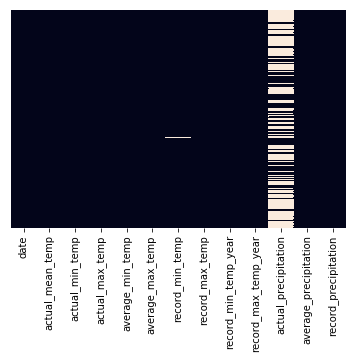

In [103]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False)

In [104]:
# Dropping the features with more than 30% missing values
data['actual_precipitation']= data.drop('actual_precipitation', axis = 1)

In [105]:
#Replacing the missing value in Variable '' With Its Mode.
data['record_min_temp']=data['record_min_temp'].fillna(value=data['record_min_temp'].mean())

In [106]:
perc_missing(data)

date                     0.0
actual_mean_temp         0.0
actual_min_temp          0.0
actual_max_temp          0.0
average_min_temp         0.0
average_max_temp         0.0
record_min_temp          0.0
record_max_temp          0.0
record_min_temp_year     0.0
record_max_temp_year     0.0
actual_precipitation     0.0
average_precipitation    0.0
record_precipitation     0.0
dtype: float64

In [107]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 13 columns):
date                     365 non-null object
actual_mean_temp         365 non-null int64
actual_min_temp          365 non-null int64
actual_max_temp          365 non-null int64
average_min_temp         365 non-null int64
average_max_temp         365 non-null int64
record_min_temp          365 non-null float64
record_max_temp          365 non-null int64
record_min_temp_year     365 non-null int64
record_max_temp_year     365 non-null int64
actual_precipitation     365 non-null object
average_precipitation    365 non-null float64
record_precipitation     365 non-null float64
dtypes: float64(3), int64(8), object(2)
memory usage: 37.1+ KB


/Users/sanaam/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/sanaam/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/sanaam/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'boxplot for actual_max_temp')

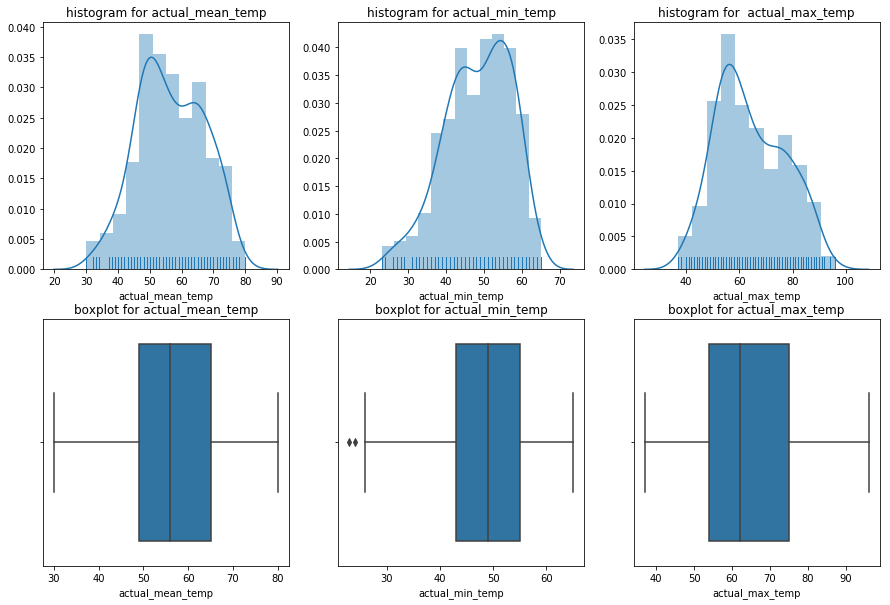

In [108]:
plt.figure(figsize = (15,10))
plt.subplot(231)
sns.distplot(data['actual_mean_temp'],rug=True)
plt.title("histogram for actual_mean_temp")
plt.subplot(234)
sns.boxplot(data.actual_mean_temp)
plt.title("boxplot for actual_mean_temp")

plt.subplot(232)
sns.distplot(data['actual_min_temp'],rug=True)
plt.title("histogram for actual_min_temp")
plt.subplot(235)
sns.boxplot(data.actual_min_temp)
plt.title("boxplot for actual_min_temp")


plt.subplot(233)
sns.distplot(data['actual_max_temp'],rug=True)
plt.title("histogram for  actual_max_temp")
plt.subplot(236)
sns.boxplot(data.actual_max_temp)
plt.title("boxplot for actual_max_temp")


Observation

1)The shape of the actual_mean_temp histogram looks almost symmetrical and of normal shape with no outliers

2)The shape of the actual_min_temp histogram looks almost symmetrical and of normal shape with 2 outlier

3)The shape of the actual_max_temp histogram looks slightly skewed to the right with no outliers


/Users/sanaam/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/sanaam/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/sanaam/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'boxplot for record_min_temp')

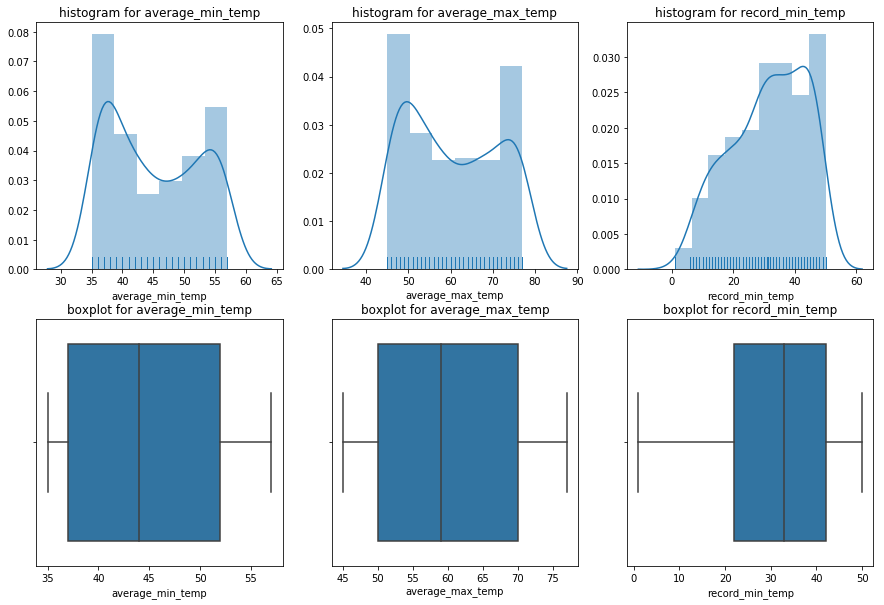

In [109]:
plt.figure(figsize = (15,10))
plt.subplot(231)
sns.distplot(data['average_min_temp'],rug=True)
plt.title("histogram for average_min_temp")
plt.subplot(234)
sns.boxplot(data.average_min_temp)
plt.title("boxplot for average_min_temp")

plt.subplot(232)
sns.distplot(data['average_max_temp'],rug=True)
plt.title("histogram for average_max_temp")
plt.subplot(235)
sns.boxplot(data.average_max_temp)
plt.title("boxplot for average_max_temp")


plt.subplot(233)
sns.distplot(data['record_min_temp'],rug=True)
plt.title("histogram for record_min_temp")
plt.subplot(236)
sns.boxplot(data.record_min_temp)
plt.title("boxplot for record_min_temp")

bservation

1)The shape of the average_min_temp histogram looks almost symmetrical and of normal shape with no outliers

2)The shape of the average_max_temp histogram looks almost symmetrical and of normal shape with no outliers

3)The shape of the record_min_temp histogram looks slightly skewed to the left with no outliers

/Users/sanaam/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/sanaam/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/sanaam/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'boxplot for record_max_temp_year')

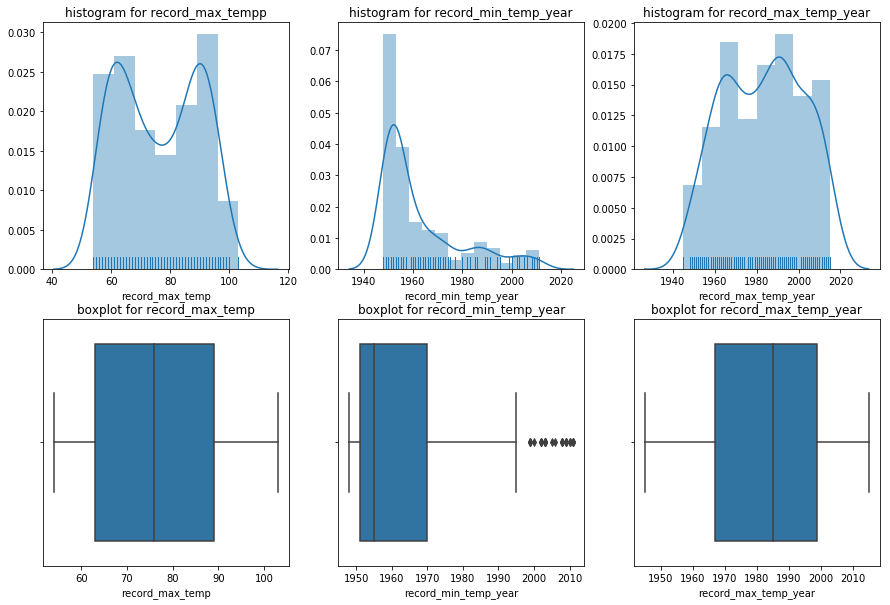

In [110]:
plt.figure(figsize = (15,10))
plt.subplot(231)
sns.distplot(data['record_max_temp'],rug=True)
plt.title("histogram for record_max_tempp")
plt.subplot(234)
sns.boxplot(data.record_max_temp)
plt.title("boxplot for record_max_temp")

plt.subplot(232)
sns.distplot(data['record_min_temp_year'],rug=True)
plt.title("histogram for record_min_temp_year")
plt.subplot(235)
sns.boxplot(data.record_min_temp_year)
plt.title("boxplot for record_min_temp_year")


plt.subplot(233)
sns.distplot(data['record_max_temp_year'],rug=True)
plt.title("histogram for record_max_temp_year")
plt.subplot(236)
sns.boxplot(data.record_max_temp_year)
plt.title("boxplot for record_max_temp_year")

observation

1)The shape of the record_max_temp histogram looks almost symmetrical and of normal shape with no outliers

2)The shape of the record_min_temp_year histogram right skew  with many  outliers

3)The shape of the record_min_temp histogram looks slightly skewed to the left with no outliers.


In [111]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 13 columns):
date                     365 non-null object
actual_mean_temp         365 non-null int64
actual_min_temp          365 non-null int64
actual_max_temp          365 non-null int64
average_min_temp         365 non-null int64
average_max_temp         365 non-null int64
record_min_temp          365 non-null float64
record_max_temp          365 non-null int64
record_min_temp_year     365 non-null int64
record_max_temp_year     365 non-null int64
actual_precipitation     365 non-null object
average_precipitation    365 non-null float64
record_precipitation     365 non-null float64
dtypes: float64(3), int64(8), object(2)
memory usage: 37.1+ KB


/Users/sanaam/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/sanaam/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'boxplot for record_precipitation')

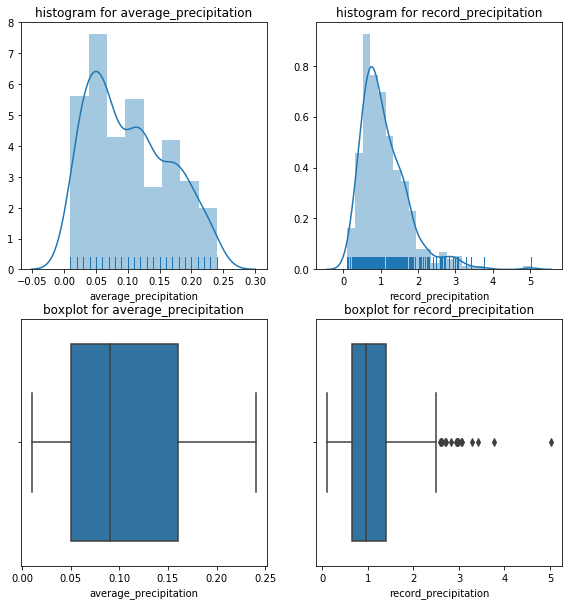

In [112]:
plt.figure(figsize = (15,10))
plt.subplot(231)
sns.distplot(data['average_precipitation'],rug=True)
plt.title("histogram for average_precipitation")
plt.subplot(234)
sns.boxplot(data.average_precipitation)
plt.title("boxplot for average_precipitation")

plt.subplot(232)
sns.distplot(data['record_precipitation'],rug=True)
plt.title("histogram for record_precipitation")
plt.subplot(235)
sns.boxplot(data.record_precipitation)
plt.title("boxplot for record_precipitation")




observation

1)The shape of the average_precipitation histogram looks almost symmetrical and of normal shape with no outliers

2)The shape of the record_precipitation histogram looks normal with many outliers




In [113]:
data.corr().T

,actual_mean_temp,actual_min_temp,actual_max_temp,average_min_temp,average_max_temp,record_min_temp,record_max_temp,record_min_temp_year,record_max_temp_year,average_precipitation,record_precipitation
actual_mean_temp,1.000000,0.948050,0.975915,0.881813,0.880315,0.844328,0.853185,-0.223128,0.046663,-0.827765,-0.482458
actual_min_temp,0.948050,1.000000,0.856911,0.823463,0.812917,0.786875,0.783964,-0.209914,0.035343,-0.760527,-0.415158
actual_max_temp,0.975915,0.856911,1.000000,0.872120,0.876734,0.835428,0.852943,-0.217524,0.053707,-0.826422,-0.499925
average_min_temp,0.881813,0.823463,0.872120,1.000000,0.990257,0.922870,0.942514,-0.303750,0.013995,-0.866082,-0.534253
average_max_temp,0.880315,0.812917,0.876734,0.990257,1.000000,0.934333,0.962095,-0.307565,0.024626,-0.912917,-0.565801
record_min_temp,0.844328,0.786875,0.835428,0.922870,0.934333,1.000000,0.911480,-0.195182,-0.009810,-0.858109,-0.520167
record_max_temp,0.853185,0.783964,0.852943,0.942514,0.962095,0.911480,1.000000,-0.302262,0.040111,-0.911226,-0.578315
record_min_temp_year,-0.223128,-0.209914,-0.217524,-0.303750,-0.307565,-0.195182,-0.302262,1.000000,-0.099600,0.282712,0.198038
record_max_temp_year,0.046663,0.035343,0.053707,0.013995,0.024626,-0.009810,0.040111,-0.099600,1.000000,-0.039821,-0.069751
average_precipitation,-0.827765,-0.760527,-0.826422,-0.866082,-0.912917,-0.858109,-0.911226,0.282712,-0.039821,1.000000,0.620303


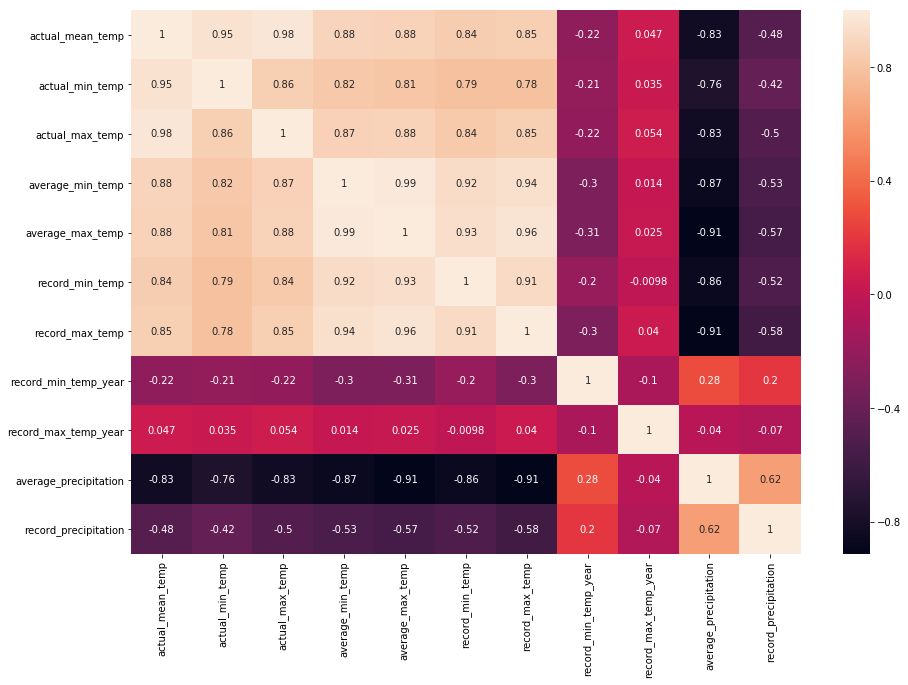

In [114]:
plt.figure(figsize=(15,10));
sns.heatmap(data[['actual_mean_temp','actual_min_temp','actual_max_temp','average_min_temp','average_max_temp','record_min_temp','record_max_temp','record_min_temp_year','record_max_temp_year','average_precipitation','record_precipitation']].corr(), annot=True)

In [116]:
data.record_max_temp.max() 

103

In [115]:
data.head()

,date,actual_mean_temp,actual_min_temp,actual_max_temp,average_min_temp,average_max_temp,record_min_temp,record_max_temp,record_min_temp_year,record_max_temp_year,actual_precipitation,average_precipitation,record_precipitation
0,2014-7-1,77,60,94,54,73,45.0,94,1948,2014,2014-7-1,0.03,0.75
1,2014-7-2,70,58,81,54,73,43.0,93,1954,2015,2014-7-2,0.03,0.50
2,2014-7-3,64,57,71,54,74,44.0,92,1954,2015,2014-7-3,0.03,0.47
3,2014-7-4,66,57,75,54,74,43.0,92,1949,2015,2014-7-4,0.03,0.57
4,2014-7-5,66,56,76,55,74,47.0,91,1951,1958,2014-7-5,0.03,0.64


#### Which day was the maximum temperature recorded? 

In [117]:
data[data.record_max_temp==data['record_max_temp'].max()]

,date,actual_mean_temp,actual_min_temp,actual_max_temp,average_min_temp,average_max_temp,record_min_temp,record_max_temp,record_min_temp_year,record_max_temp_year,actual_precipitation,average_precipitation,record_precipitation
28,2014-7-29,73,60,86,57,77,45.0,103,1954,2009,2014-7-29,0.02,0.17


#### Date is 2014-7-29 & temp is 103

Q2 Highest rainfall or snow recorded in which year

In [118]:
data[data.record_precipitation==data['record_precipitation'].max()]

,date,actual_mean_temp,actual_min_temp,actual_max_temp,average_min_temp,average_max_temp,record_min_temp,record_max_temp,record_min_temp_year,record_max_temp_year,actual_precipitation,average_precipitation,record_precipitation
111,2014-10-20,58,54,61,45,58,29.0,69,1949,1987,2014-10-20,0.12,5.02


Year 2014 & record rainfall 5.02

	D)  How much of the rainfall and the hottest temperature recorded over last six months?

In [119]:
data['date'] = pd.to_datetime(data['date'])
data['date'].max()

Timestamp('2015-06-30 00:00:00')

In [120]:
data.query('date < "2015-06-30 00:00:00" and date > "2015-01-30"')[['record_max_temp', 'record_precipitation']].sum()

record_max_temp         11533.00
record_precipitation      151.14
dtype: float64

E)  Is temperature consistent during any period of time? Examine?

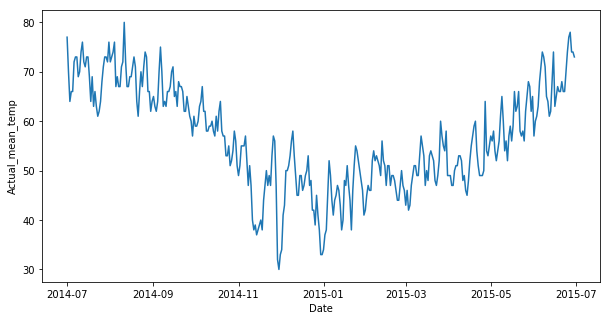

In [121]:
plt.figure(figsize=(10,5));
plt.plot(data['date'], data['actual_mean_temp']);
plt.xlabel('Date');
plt.ylabel('Actual_mean_temp')
plt.show();

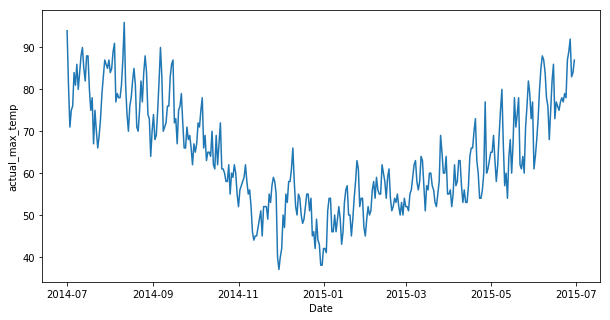

In [123]:
plt.figure(figsize=(10,5));
plt.plot(data['date'], data['actual_max_temp']);
plt.xlabel('Date');
plt.ylabel('actual_max_temp')
plt.show();

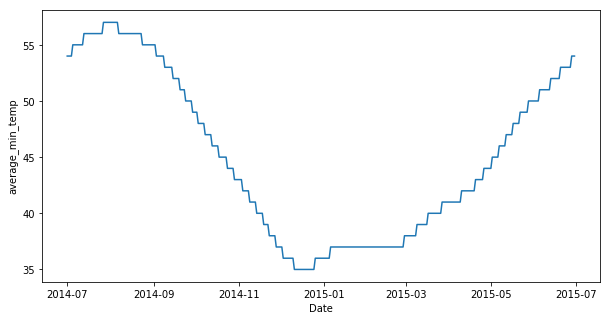

In [124]:
plt.figure(figsize=(10,5));
plt.plot(data['date'], data['average_min_temp']);
plt.xlabel('Date');
plt.ylabel('average_min_temp')
plt.show();

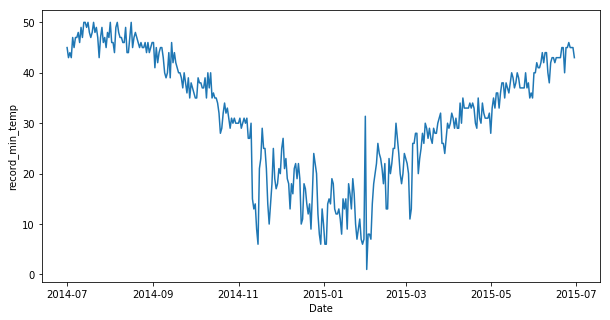

In [125]:
plt.figure(figsize=(10,5));
plt.plot(data['date'], data['record_min_temp']);
plt.xlabel('Date');
plt.ylabel('record_min_temp')
plt.show();

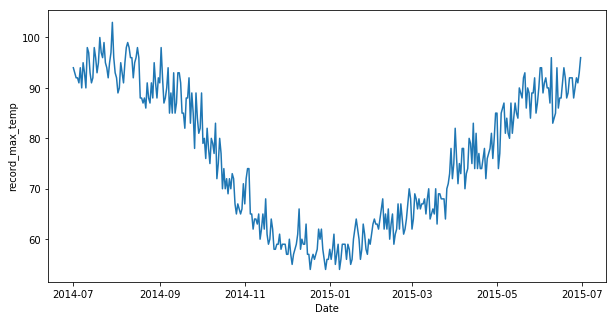

In [126]:
plt.figure(figsize=(10,5));
plt.plot(data['date'], data['record_max_temp']);
plt.xlabel('Date');
plt.ylabel('record_max_temp')
plt.show();

#### No temperature is not consistent during any period of time by seeing the different time series